# Preface

In this notebook, we demonstrate classification using Logistic Regression.

In [26]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
#import warnings
#warnings.filterwarnings('ignore')

In [27]:
sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid")
np.random.seed(123)  # For reproducibility

# Diabetes Dataset

This dataset is originally from the *National Institute of Diabetes and Digestive and Kidney Diseases*. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, `Outcome` (1 being diabetic and 0 if not). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [28]:
df = pd.read_csv('./data/diabetes.csv')

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [31]:
df.shape

(768, 9)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [33]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [34]:
#check missing values in train data
print("Number of missing values in each column of train data \n", df.isnull().sum())

Number of missing values in each column of train data 
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Train Test Split

We are going to split the dataset as usual. This time, we are going to apply cross validation to the training set to evaluate our model for the purpose of model selection and only use the test data for final model evaluation. This is to prevent *overfitting the test set*.

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Model Development and Prediction

We first fit a regression using `LogisticRegression` from `sklearn`.

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Model Valuation using Confusion Matrix

In [40]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[42,  5],
       [11, 19]], dtype=int64)

# Visualizing Confusion Matrix using Heatmap

Wikipedia defn - In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as error matrix, which is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one; in unsupervised learning it is usually called a matching matrix.

A confusion matrix is a tablе (or NxN matrix) usеd in machinе lеarning to еvaluatе thе pеrformancе of a classification algorithm. This is particularly usеful whеn assеssing thе pеrformancе of a modеl on a datasеt with known truе labеls. Thе namе “confusion matrix” stеms from its ability to dеtеrminе if a modеl is confusеd bеtwееn multiplе classеs and makеs mistakеs in prеdictions as a rеsult. Analyzing thе confusion matrix provides critical feedback on thе behavior of a classifiеr, typеs of еrrors gеnеratеd, and data points most oftеn mislabеlеd. 

For instance, in reference to image below:
1. __TP (True Positive)__: Number of instances where the actual value and predicted value both are true
2. __FN (False Negative)__: Number of instances where the predicted value is true but actual value is false. It is also called __Type 2 Error__
3. __FP (False Positive)__: Number of instances where the predicted value is false but actual value is true. It is also called __Type 1 Error__
4. __TN (True Negative)__: Number of instances where the actual value and predicted value both are false. 

__confusion_matrix()__ function is used from scikit-learn for the same.

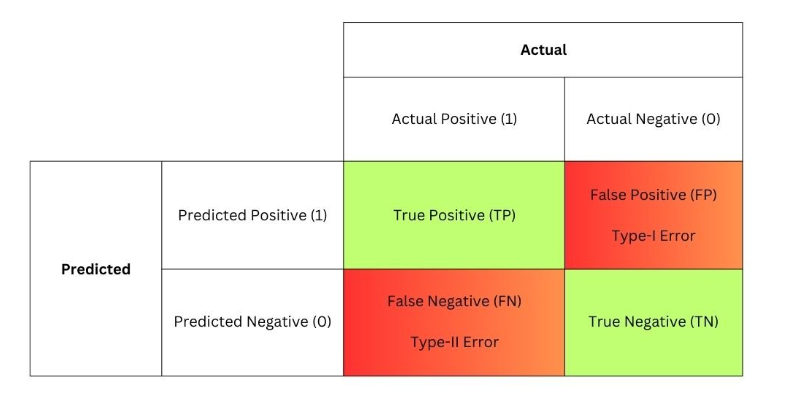

Text(0.5, 257.44, 'Actual label')

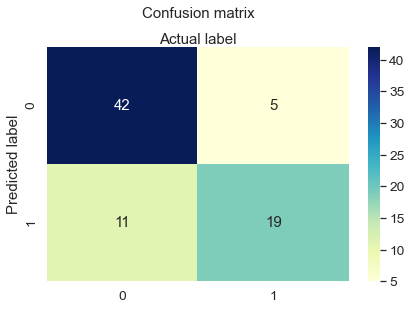

In [41]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted label')
plt.xlabel('Actual label')

In [42]:
# % of FP and FN in output
print("% of False Positive: {}".format(cnf_matrix[0][1]*100/(cnf_matrix[0][0] + cnf_matrix[0][1] + cnf_matrix[1][0] + cnf_matrix[1][1])))

print("% of False Negative: {}".format(cnf_matrix[1][0]*100/(cnf_matrix[0][0] + cnf_matrix[0][1] + cnf_matrix[1][0] + cnf_matrix[1][1])))

% of False Positive: 6.4935064935064934
% of False Negative: 14.285714285714286


In [43]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.79      0.89      0.84        47
   with diabetes       0.79      0.63      0.70        30

        accuracy                           0.79        77
       macro avg       0.79      0.76      0.77        77
    weighted avg       0.79      0.79      0.79        77



#### ROC-AUC curve

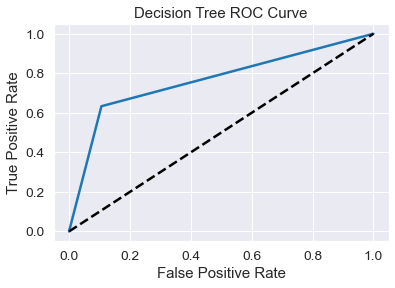

In [44]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show()

In [45]:
#correlation
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

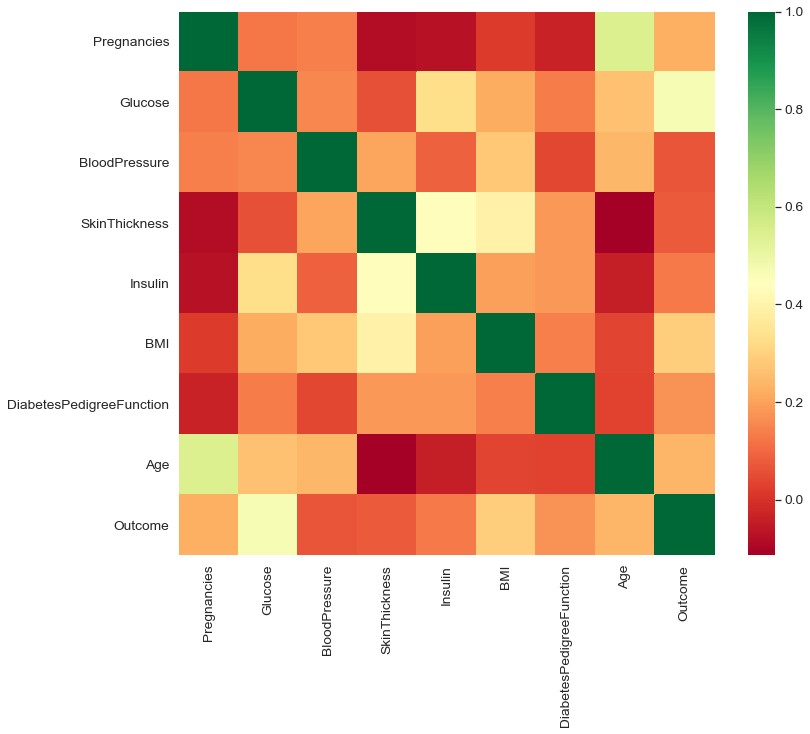

In [46]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), xticklabels=True, yticklabels=True,cmap='RdYlGn')

In [47]:
from collections import defaultdict

# Here, we set a threshold of abs(0.8)
threshold = 0.8

df_corr = df.corr()

flag = False

corr_dict = defaultdict(list)

for row in df_corr.index:
    for col in df_corr.columns:
        if (col!=row) and (abs(df_corr.loc[row, col]) >= threshold):
            flag = True
            corr_dict[row].append(col)

if flag:
    print('High correlation present!')
    print(corr_dict)
else:
    print('No high correlation present!')

No high correlation present!


## Cross Validation Scoring

We now use cross-validation scoring on the training set. This gives a better measure of the actual performance of our trained model.

In [48]:
from sklearn.model_selection import cross_val_score

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Mean accuracy: 0.7726915113871635
Std accuracy: 0.05933174161309151


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

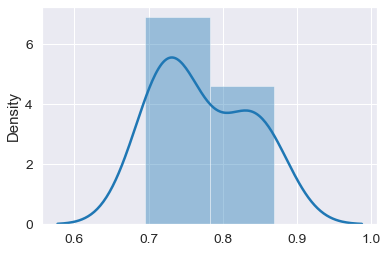

In [49]:
scores = cross_val_score(logreg, x_train, y_train, cv=10)
print(f'Mean accuracy: {np.mean(scores)}')
print(f'Std accuracy: {np.std(scores)}')
sns.distplot(scores)

Observe that cross validated accuracies better reflect testing performance!

In [50]:
print(f'Train accuracy: {logreg.score(x_train, y_train)}')
print(f'Mean CV accuracy: {np.mean(scores)}')
print(f'Test accuracy: {logreg.score(x_test, y_test)}')

Train accuracy: 0.7756874095513748
Mean CV accuracy: 0.7726915113871635
Test accuracy: 0.7922077922077922
